<a href="https://colab.research.google.com/github/nabila0721/Hello-world/blob/master/AE_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, MaxPool2D, Activation

In [0]:
def normalize_reshape(x):
  x = x.reshape(-1, 28, 28, 1)
  x = x.astype('float32') / 255
  x_flatten = x.reshape((len(x), np.prod(x_train.shape[1:])))
  
  return x, x_flatten

In [0]:
def get_mlp_ae(encoding_dim):
  input_img = Input(shape=(784,))

  # "encoded" is the encoded representation of the input
  encoded = Dense(encoding_dim, activation='relu')(input_img)

  # "decoded" is the lossy reconstruction of the input
  decoded = Dense(784, activation='sigmoid')(encoded)

  # this model maps an input to its reconstruction
  autoencoder = Model(input_img, decoded)

  encoder = Model(input_img, encoded)

  # create a placeholder for an encoded (32-dimensional) input
  encoded_input = Input(shape=(encoding_dim,))
  # retrieve the last layer of the autoencoder model
  decoder_layer = autoencoder.layers[-1]
  # create the decoder model
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  
  return encoder, decoder, autoencoder

In [0]:
def get_cnn_ae():
  pass

In [0]:
def plot_sample(imgs, encoded_imgs, encoded_imgs_size, decoded_imgs):
  ids = np.random.randint(10000, size=10)
  for id in ids:
    plt.figure(figsize=(10, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(imgs[id].reshape([-1, 28]))
    plt.subplot(1, 3, 2)
    plt.imshow(encoded_imgs[id].reshape([-1, encoded_imgs_size]))
    plt.subplot(1, 3, 3)
    plt.imshow(decoded_imgs[id].reshape([-1, 28]))

In [0]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
(x_train_mnist, _), (x_test_mnist, _) = tf.keras.datasets.mnist.load_data()

x_train, x_train_flatten = normalize_reshape(x_train)
x_test, x_test_flatten = normalize_reshape(x_test)

x_train_mnist, x_train_mnist_flatten = normalize_reshape(x_train_mnist)
x_test_mnist, x_test_mnist_flatten = normalize_reshape(x_test_mnist)

e, d, ae = get_mlp_ae(64)
ae.compile(optimizer='adadelta', loss='mse')
ae.fit(x_train_flatten, x_train_flatten,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = e.predict(x_test_flatten)
decoded_imgs = d.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1163 - val_loss: 0.0881
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0799 - val_loss: 0.0716
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0666 - val_loss: 0.0615
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0588 - val_loss: 0.0560
Epoch 5/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0546 - val_loss: 0.0527
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0514 - val_loss: 0.0497
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0485 - val_loss: 0.0470
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0459 - val_loss: 0.0445
Epoch 9/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0435 - val_loss: 0.0424
Epoch

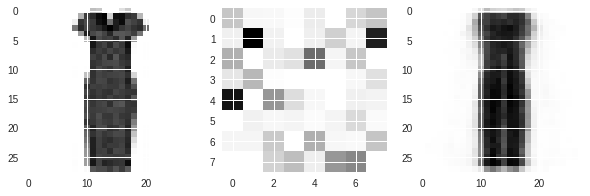

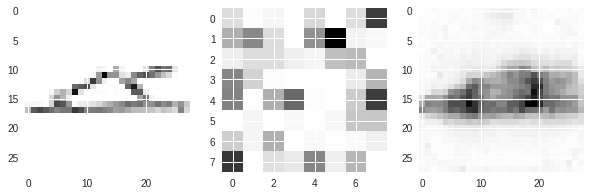

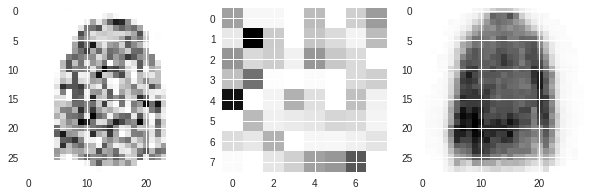

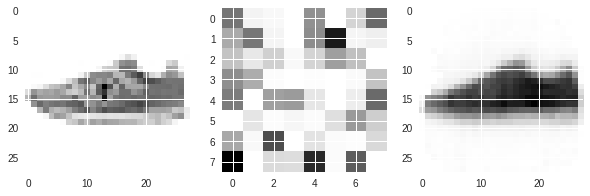

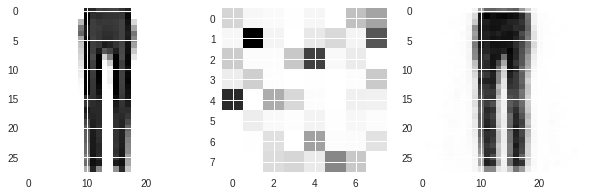

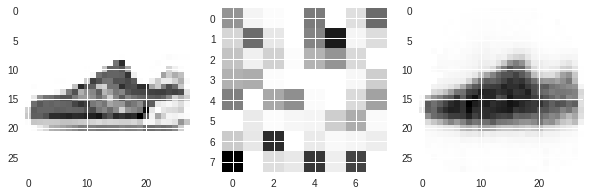

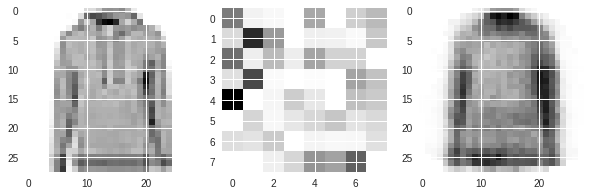

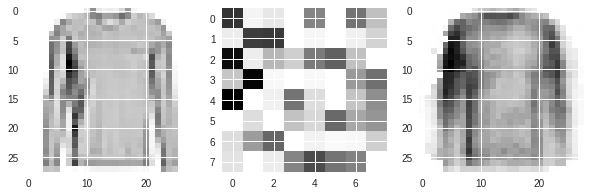

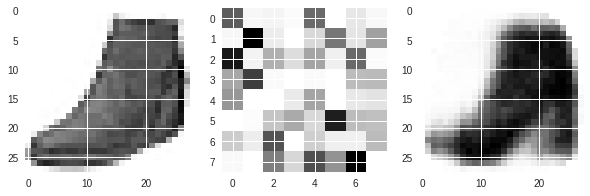

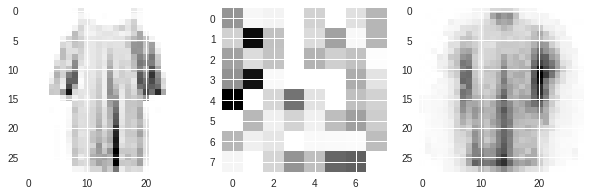

In [0]:
plot_sample(x_test, encoded_imgs, 8, decoded_imgs)

In [0]:
e_mnist, d_mnist, ae_mnist = get_mlp_ae(64)
ae_mnist.compile(optimizer='adadelta', loss='mse')
ae_mnist.fit(x_train_mnist_flatten, x_train_mnist_flatten,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_mnist_flatten, x_test_mnist_flatten))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs_mnist = e_mnist.predict(x_test_mnist_flatten)
decoded_imgs_mnist = d_mnist.predict(encoded_imgs_mnist)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.1180 - val_loss: 0.0717
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0699 - val_loss: 0.0685
Epoch 3/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0672 - val_loss: 0.0655
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0638 - val_loss: 0.0615
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0595 - val_loss: 0.0571
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0554 - val_loss: 0.0531
Epoch 7/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0518 - val_loss: 0.0498
Epoch 8/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0489 - val_loss: 0.0471
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0464 - val_loss: 0.0448
Epoch

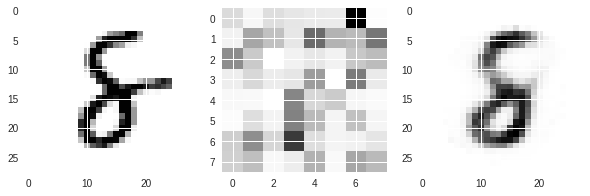

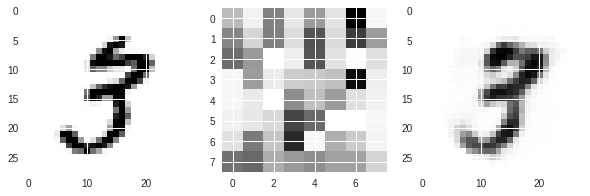

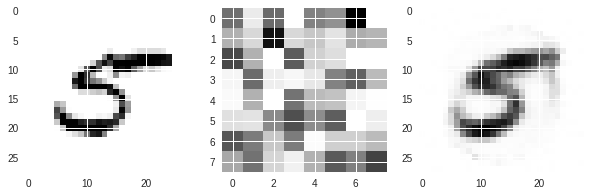

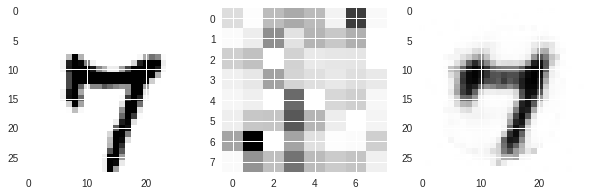

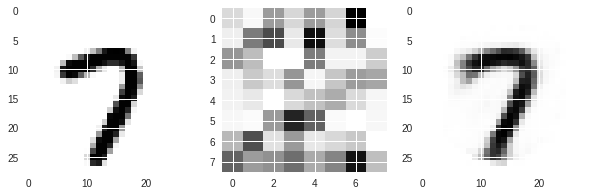

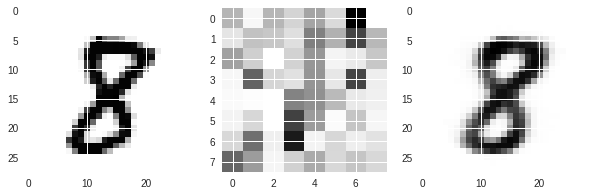

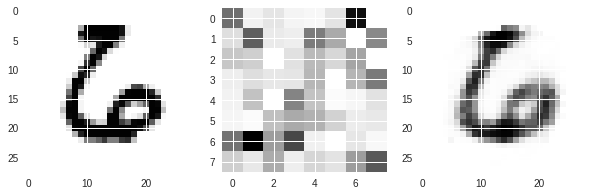

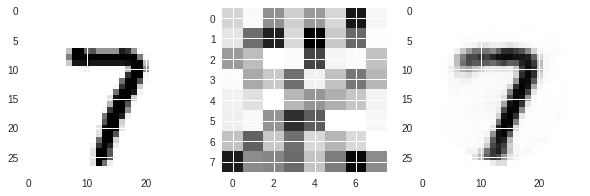

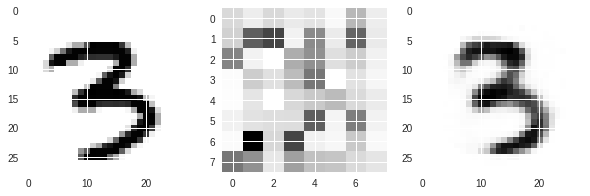

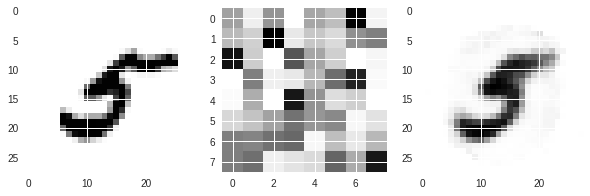

In [0]:
plot_sample(x_test_mnist_flatten, encoded_imgs_mnist, 8, decoded_imgs_mnist)

**Encoding and decoding Fashion-MNIST images with autoencoder trained on MNIST dataset**

In [0]:
encoded_imgs_1 = e_mnist.predict(x_test_flatten)
decoded_imgs_1 = d_mnist.predict(encoded_imgs_1)

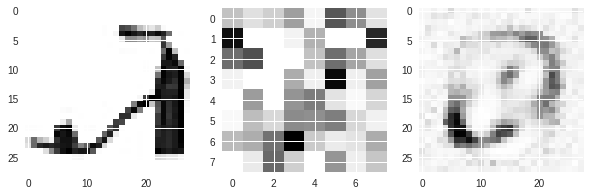

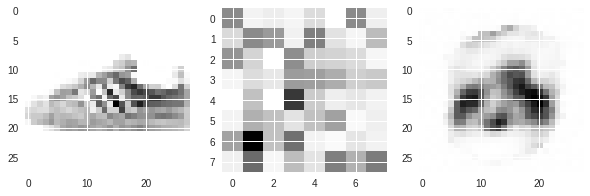

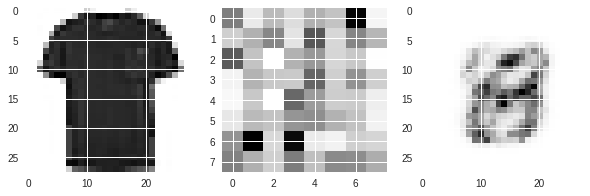

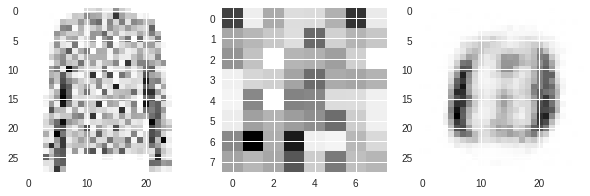

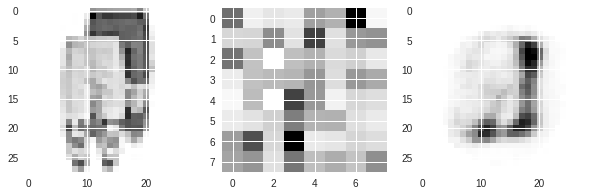

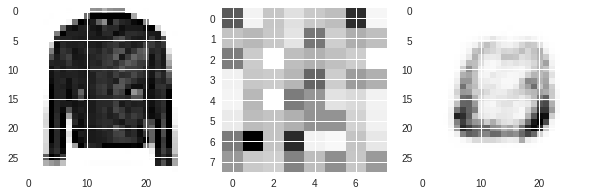

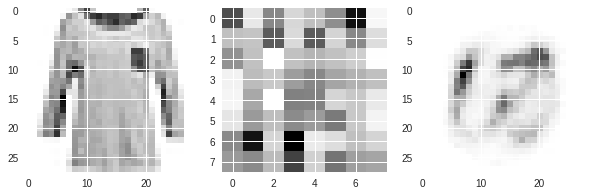

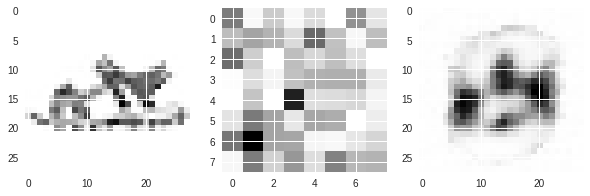

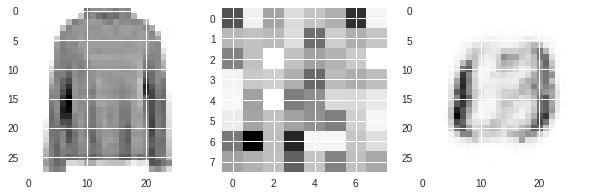

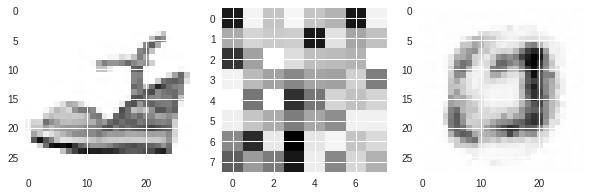

In [0]:
plot_sample(x_test_flatten, encoded_imgs_1, 8, decoded_imgs_1)